In [5]:
import dotenv
import json
from twon_lss.simulations.wp3_simulation import agent_parameter_estimation
from twon_lss.simulations.wp3_simulation import (
    Simulation,
    SimulationArgs,
    WP3Agent,
    AgentInstructions,
    WP3LLM,
    agent_parameter_estimation,
    simulation_load_estimator,
)

from twon_lss.utility import LLM, Message, Chat, Noise

In [6]:
ENV = dotenv.dotenv_values("../" * 3 + ".env")

In [7]:
with open("../data/agents.personas_dummy.json", "r") as f:
    data = json.load(f)

In [8]:
len(data)

1064

In [5]:
tweets_per_day = [agent["posts_per_day"] for agent in data]

In [6]:
results = []
for i, tweets_per_day in enumerate(tweets_per_day):
    results.append(agent_parameter_estimation(tweets_per_day, seed=i))

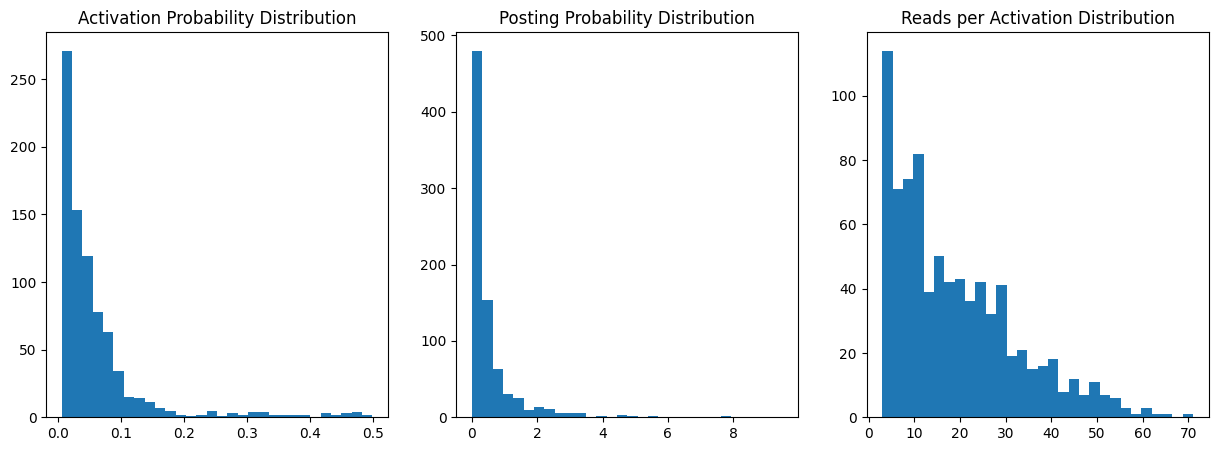

In [7]:
# visualize distributions
import matplotlib.pyplot as plt
activations = [res["activation_probability"] for res in results]
postings = [res["posting_probability"] for res in results]
reads = [res["read_amount"] for res in results]
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(activations, bins=30)
plt.title("Activation Probability Distribution")
plt.subplot(1,3,2)
plt.hist(postings, bins=30)
plt.title("Posting Probability Distribution")
plt.subplot(1,3,3)
plt.hist(reads, bins=30)
plt.title("Reads per Activation Distribution")
plt.show()


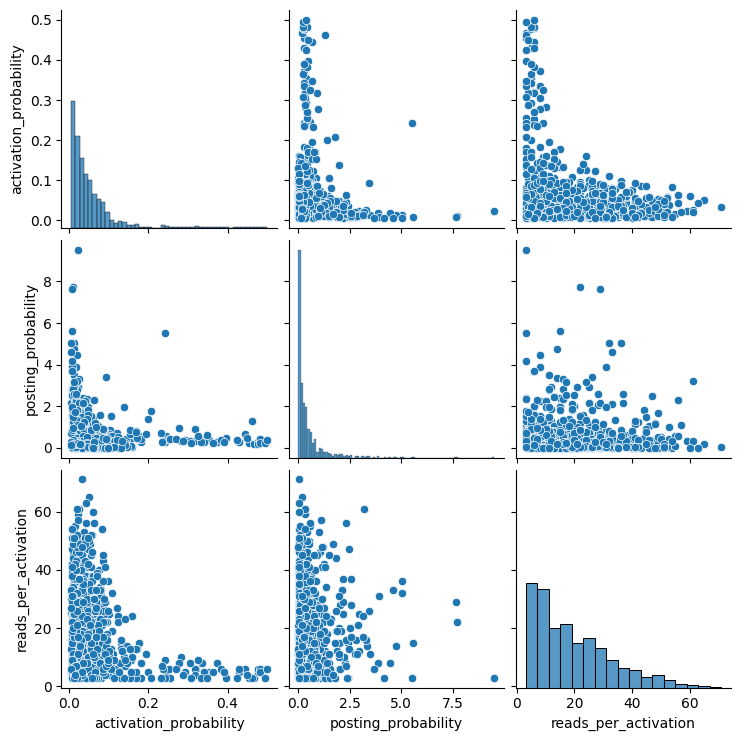

In [8]:
# visualize connections
import seaborn as sns
import pandas as pd
df = pd.DataFrame({
    "activation_probability": activations,
    "posting_probability": postings,
    "reads_per_activation": reads
})
sns.pairplot(df)
plt.show()